# ModelFlow methods reference 

The main text of this document presents a large range of `ModelFlow` features in the context of where they may be used.  This chapter reproduces much of that information but out of context.  It is not a full technical reference to `ModelFlow`  but it does attempt to put into place a handy reference to many of the commands that a `ModelFlow` user of the World Bank models would need.


In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [2]:
# Prepare the notebook for use of ModelFlow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of ModelFlow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [3]:
import matplotlib.pyplot as plt # To manipulate plots 

## Useful Jupyter Notebook commands and features

### .widescreen() 

Instructs ModelFlow to take full advantage of the space available on the browser under which `Jupyter Notebook` is running.

In [4]:
model.widescreen() 

### .scroll_off()

Instructs ModelFlow not to scroll in lang cell but to show the whole output. Useful when displaying multiple charts and tables. 

In [5]:
model.scroll_off()

<IPython.core.display.Javascript object>

In [6]:
latex=True #used to ensure  that outputs render well in pdf format

## Working with the Model Object

The model object is the central object in `ModelFLow`.  It's methods are used to read and write models from disk, and to perform simulations, and to report the results of simulations both as graphs and tables.  Its properties include the data associated with the model, the current options that impact simulations, the individual equations that together comprise the system of equations that the model object solves.

## Selected model properties
Models once built can be saved to disk for later reloading.  The entire model state can be saved, including options for the solve operator, and the results from solutions that were earlier run with the keep option.

The model state has many properties. Including: 

|Content|Property|Description |
| --- | ---- |  ---- | 
|Model equations|`.equation`| Returns a very long string containing all of the equations of the model|
|Model name  |`.name` | Returns the internal name of the model. For WBG models this is typically the 3 letter ISO code for the country , i.e. PAK|
|Model description |`.model_description` | If defined, returns a string with a longer description of the model -- otherwise returns a blank string|
|Base solution|`.basedf`   |Returns a `DataFrame` of all the variables in the model with the values from the baseline or initialization values of the model.|
|Last solution|`.lastdf`   |Returns a `DataFrame` of all the variables in the model with the values from the most recently executed simulation.|
|Kept solutions|`.keep_solutions`   |A dictionary of `DataFrame`s. The key to the dictionary is the text passed to the `keep=`copmmand when the solution was run, and the value is the `DataFrame` generated by the simulation.|
|Current time frame|`.current_per`   | Returns the active sample period of the model (the time-slice over which the model will be solved).|
|Simulation options|`.oldkwargs`    | Returns a dictionary, showing the current state of the persistent options of the model.|
|Variable descriptions|`.var_description`   |Returns a dictionary, with long form descriptions of those mnemonics in the model that have been assigned a long-form description. |
|User defined lists of variables |`.var_groups`    |Returns a dictionary, showing the various groups (lists of variables) that have been defined for this model object.|
|Reports|`.reports`| Returns a Dictionary of all Reports (if any) that have been defined for the  model|

## Selected Model methods

### .model_load() method: Loading  models

The `model_load()`method instantiates (creates) a new model object from a previously saved pcim file. 


Parameters:

| Parameter | Type | Description |
|-----------|------|-------------|
| `infile` | string | The name of the file or URL from which the model will be loaded. |
| `funks` | list | Functions to use in the resulting model. Default is an empty list. |
| `run` | bool | If `True`, simulates the model with the saved time and options. Default is `False`. |
| `keep_json` | bool | If `True`, saves a dictionary (`self.json_keep`) in the model instance. Default is `False`. |
| `default_url` | string | The default URL where to look for the model if it is not in the specified location. Default value is:<br> 'https://raw.githubusercontent.com/IbHansen/ModelFlow-manual/main/model_repo/',**kwargs)'| 
| `**kwargs` | dict | Additional keyword arguments used by the simulation if `run=True`. |

Returns

- **tuple**: A tuple containing a model instance and a DataFrame.

#### Load an example model and create a model instance
Also the model is run 

In [7]:
mpak,baseline = model.modelload('../models/pak.pcim', \
         run=True,keep= 'Baseline')

file read:  ..\models\pak.pcim


themodel will be the model instance object and baseline is a `DataFrame` holding the results of the simulation invoked by the run=True option.  The result of the initial simulation is also stored as a scenario identified by the text 'Baseline'.`

### .model_dump() method: Saving  models
The `.modeldump()` method saves the content of a model object to disk. By default models are stored using the [**json** format](https://en.wikipedia.org/wiki/JSON). By convention dumped ModelFlow objects are saved to a file with the **.pcim** extension.


 Parameters:

| Parameter | Type | Description |
|-----------|------|-------------|
| `outfile` | string | The name of the file where the model will be dumped. Default is an empty string, meaning the dump will be returned as a string. |
| `keep` | bool | If `True`, the `keep_solutions` attribute of the model will also be dumped. Default is `False`. |

 Returns

- **string**: If `outfile` is an empty string, the method returns the model dump as a JSON string.

#### example
in the line below the model, dataframe and more are saved in a folder called:`testmodel`

In [8]:
mpak.modeldump('Mymodel/Mymodel',keep=True)

Saves the model object `mpak` to a file called Mymodel.pcim located in the models sub-directory.  The model would also contain the results dataframes for all the simulations that were stored with the keep option.

In [9]:
!dir Mymodel\*.pcim

 Volume in drive C has no label.
 Volume Serial Number is C2DB-095E

 Directory of c:\modelflow manual\papers\mfbook\content\07_MoreFeatures\Mymodel

23-10-2024  09:35         1.606.383 Mymodel.pcim
               1 File(s)      1.606.383 bytes
               0 Dir(s)  648.457.875.456 bytes free


## Equations
        

### `.wb_behavioral` property: returns a list of fixable (behavioural) equations

`.wb_behavioral` is a property of a model object, which defines all of the behavioural (fixable) equations in the model object.

#### example
`themodel.wb_behavioral` will return a list of all the variables with fixable equations.


### Fixable equations


A behavioural equation determines the value of an endogenous variable, based on an econometric relationship
rather than an accounting identity. They are comprised of right-hand side variables (the regressors in the econometric
relationship or the dependent variable), left hand side variables (the regressands or explanatory variables), estimated
parameters, perhaps some imposed parameters, and the error term.

|Terminator| Meaning| Role|
|:--|:--|:--|
|\_A|Add factor:| special variable to allow judgment to be added to an equation|
|\_X|Exogenized value:| Special variable that stores the value that the equation should return if exogenized|
|\_D|Exogenous dummy:|Dummy variable. When set to one, the equation will return the value of the \_𝑋 variable, if zero, it returns the fitted value of the equation plus the Add factor|

A standard econometric equation such as $ y_t = \hat{\alpha} + \hat{\beta} X_t + y\_A_t$ can be rewritten as 

\begin{equation*}
y_t = (1-y\_D_t)\cdot\underbrace{\biggl[\hat{\alpha} + \hat{\beta} X_t + y\_A_t\biggr]}_{\begin{array}{c} \text{Econometric equation}\end{array}} + y\_D_t\cdot \underbrace{y\_X_t}_{\begin{array}{c} \text{Exogenized} \\ \text{value} \end{array}}
\end{equation*}

When $y\_D_t=1$ then the first expression (the equation) solves to zero and the equation just returns the value $y\_X_t$.


### .fix() method: exogenizes one or more equations in the model.

The `fix()`method sets the $\_D$ variable to 1 and the $_X$ variable to the desired value.

Parameters:

| Parameter | Type           | Description                                                   |
|-----------|----------------|---------------------------------------------------------------|
| `df`      | TYPE           | Input dataframe should contain a solution and all variables.  |
| `pat`     | TYPE, optional | Select variables to exogenize. Defaults to '\*' (All variables).|
| `start`   | TYPE, optional | Start period. Defaults to ''.                                 |
| `end`     | TYPE, optional | End period. Defaults to ''.                                   |
| `silent`  | int, optional  | If set to 1, suppresses print output. Defaults to 0.          |
Returns

- **tuple**: A tuple containing a model instance and a DataFrame.

#### example 1


Cfixed=themodel.fix(baseline,'PAKNECONPRVTKN')

Returns a new `DataFrame` `Cfixed` exactly equal to the baseline `DataFrame` but with the `PAKNECONPRVTKN_D` variable set to 1.  This equation will now return `PAKNECONPRVTKN_X` for all periods where `PAKNECONPRVTKN_D` is equal to 1.  `PAKNECONPRVTKN_X` will be set equal to the current value of `PAKNECONPRVTKN`. To do a meaningful simulation the value of `PAKNECONPRVTKN_X` would have to be changed, say as below.

and 2040
`Cfixed=Cfixed.upd("<2025 2040> PAKNECONPRVTKN_X * 1.025")` which would increase the value of consumption by 2.5%.



#### example 2

Cfixed2=themodel.fix(baseline,'PAKNECONPRVTKN',start=2045,end=2050)

Returns a new `DataFrame` `Cfixed` exactly equal to the baseline `DataFrame` but with the `PAKNECONPRVTKN_D` variable set to 1 for the years 2045 through 2050.  This equation will now return `PAKNECONPRVTKN_X` for this period.

`Cfixed=Cfixed.upd("<2025 2040> PAKNECONPRVTKN_X * 1.025")` which would increase the value of consumption by 2.5%.

In this example the changes to `PAKNECONPRVTKN_X` would have no effect as the variable was only exogenized for the period 2045 through 2050.




### .unfix() method:re-activates an exogenized equation

Parameters:
| Parameter | Type             | Description                                                   |
|-----------|------------------|---------------------------------------------------------------|
| `df`      | Dataframe        | Input dataframe, should contain a solution and all variables. |
| `pat`     | string, optional | Select variables to endogenize. Defaults to '*'.              |
| `start`   | TYPE, optional   | Start period. Defaults to ''.                                 |
| `end`     | TYPE, optional   | End period. Defaults to ''.                                   |

Returns:

A dataframe with the `_D` version of the specified variables set to zero for the specified time period.

#### example

Unfixed=themodel.fix(Cfixed2,'PAKNECONPRVTKN')  

Creates a new `DataqFrame` that is a copy of `Cfixed2` but with `PAKNECONPRVTKN_D` equal to zero over the entire period.


### `.fix_inf()` property: Returns a list of the variables currently exogenized (fixed) 

### `.wb_behavioral()` property: Returns a list of all variables whose equations can be  exogenized (fixed) 



## Visualize equations

`ModelFlow` offers three ways to visualize an equation.

|Methods|Returns|
|:--|:--|
|.eviews()| returns the original EViews form of the equation (only available for models imported from EViews)|
|.frml()| returns the internal normalized version of the EViews equation|
|.show()| returns the internal normalized version of the EViews equation and data for theLHS and RHs variables of the equation from both the `.basedf`, `.lastdf` `DataFrames` and their differences |

### .eviews() method: Diplays the original format of the equation

In [10]:
mpak.PAKBXGSRMRCHCD.eviews

DLOG(PAKBXGSRMRCHCD) = 2.82268702067837e-08*(LOG(PAKBXGSRMRCHCD( - 1)) - 505277.224656802*LOG(PAKXMKT( - 1)) - 2.91054176583784*LOG(PAKREER( - 1))) + 0.0683002735007435 + 0.167350489665585*DLOG(PAKXMKT) + 0.0611655503957304*DLOG(PAKREER)


### .eviews() method: Displays the normalized form of the equation


In [11]:
mpak.PAKBXGSRMRCHCD.frml

Endogeneous: PAKBXGSRMRCHCD: Exp., MRCH (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRMRCHCD = (PAKBXGSRMRCHCD(-1)*EXP(PAKBXGSRMRCHCD_A+ (2.82268702067837E-08*(LOG(PAKBXGSRMRCHCD(-1))-505277.224656802*LOG(PAKXMKT(-1))-2.91054176583784*LOG(PAKREER(-1)))+0.0683002735007435+0.167350489665585*((LOG(PAKXMKT))-(LOG(PAKXMKT(-1))))+0.0611655503957304*((LOG(PAKREER))-(LOG(PAKREER(-1))))) )) * (1-PAKBXGSRMRCHCD_D)+ PAKBXGSRMRCHCD_X*PAKBXGSRMRCHCD_D  $

PAKBXGSRMRCHCD  : Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_A: Add factor:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_D: Fix dummy:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_X: Fix value:Exp., MRCH (BOP), US$ mn
PAKREER         : Real Exchange Rate (Trade Weighted)
PAKXMKT         : Weighted Trading Partner Demand




### .show() method: Displays the normalized form of the equation plus data from the `.lastdf`, `.basedf` `DataFrame`s and their difference

In [12]:
mpak.PAKBXGSRMRCHCD.show

Endogeneous: PAKBXGSRMRCHCD: Exp., MRCH (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRMRCHCD = (PAKBXGSRMRCHCD(-1)*EXP(PAKBXGSRMRCHCD_A+ (2.82268702067837E-08*(LOG(PAKBXGSRMRCHCD(-1))-505277.224656802*LOG(PAKXMKT(-1))-2.91054176583784*LOG(PAKREER(-1)))+0.0683002735007435+0.167350489665585*((LOG(PAKXMKT))-(LOG(PAKXMKT(-1))))+0.0611655503957304*((LOG(PAKREER))-(LOG(PAKREER(-1))))) )) * (1-PAKBXGSRMRCHCD_D)+ PAKBXGSRMRCHCD_X*PAKBXGSRMRCHCD_D  $

PAKBXGSRMRCHCD  : Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_A: Add factor:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_D: Fix dummy:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_X: Fix value:Exp., MRCH (BOP), US$ mn
PAKREER         : Real Exchange Rate (Trade Weighted)
PAKXMKT         : Weighted Trading Partner Demand

Values :


,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,"21,971.28","22,002.97","22,065.82","22,268.40","22,588.00","22,997.43","23,476.77","24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67"
Last,"21,971.28","22,002.97","22,065.82","22,268.40","22,588.00","22,997.43","23,476.77","24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67"
Diff,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Input last run:


,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
PAKBXGSRMRCHCD(-1),"24,090.00","21,971.28","22,002.97","22,065.82","22,268.40","22,588.00","22,997.43","23,476.77","24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03"
PAKBXGSRMRCHCD_A,-0.13,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,119.72,123.03,125.63,130.76,137.93,145.77,153.19,159.92,165.96,171.41,176.37,180.95,185.21,189.25,193.17
PAKREER(-1),122.39,119.72,123.03,125.63,130.76,137.93,145.77,153.19,159.92,165.96,171.41,176.37,180.95,185.21,189.25
PAKXMKT,10.62,11.14,11.41,11.69,11.98,12.27,12.57,12.87,13.19,13.51,13.84,14.18,14.52,14.88,15.24
PAKXMKT(-1),10.31,10.62,11.14,11.41,11.69,11.98,12.27,12.57,12.87,13.19,13.51,13.84,14.18,14.52,14.88


Input base run:


,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
PAKBXGSRMRCHCD(-1),"24,090.00","21,971.28","22,002.97","22,065.82","22,268.40","22,588.00","22,997.43","23,476.77","24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03"
PAKBXGSRMRCHCD_A,-0.13,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,119.72,123.03,125.63,130.76,137.93,145.77,153.19,159.92,165.96,171.41,176.37,180.95,185.21,189.25,193.17
PAKREER(-1),122.39,119.72,123.03,125.63,130.76,137.93,145.77,153.19,159.92,165.96,171.41,176.37,180.95,185.21,189.25
PAKXMKT,10.62,11.14,11.41,11.69,11.98,12.27,12.57,12.87,13.19,13.51,13.84,14.18,14.52,14.88,15.24
PAKXMKT(-1),10.31,10.62,11.14,11.41,11.69,11.98,12.27,12.57,12.87,13.19,13.51,13.84,14.18,14.52,14.88


Difference for input variables


,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
PAKBXGSRMRCHCD(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKXMKT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKXMKT(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### 

### .var_with_frmlname('DAMP'), Dampable variables
Equations in the ModelFlow business language looks like this: 
> FRML \<options> \<right hand variable> = \<left hand side  expression>

The option: `DAMP` makes an equation dampable.

To retrieve all dampable variables. use 
> mpak.var_with_frmlname('DAMP')

It returns a **set** of variable names. Below the the set is made to a sorted **list** and the first 3 variable names are printed. 

In [13]:
dampable_variables = sorted(mpak.var_with_frmlname('DAMP'))
print(f'Number of dampable variables: {len(dampable_variables)}')
print(f'First 3 dampable variables  : {dampable_variables[:3]}')


Number of dampable variables: 75
First 3 dampable variables  : ['PAKBMFSTOTHRCD', 'PAKBMFSTREMTCD', 'PAKBMGSRGNFSCD']


## Manipulating `DataFrames`

### `.loc()` method
### `.upd()` method
### `.mfcalc()` method

## Performing Simulations
(simulationEngines)=
### Simulation engines

###  `.ModelObjectName` method

The most convenient way to solve a model is to call it by passing simulation parameters directly to the model instance. 

Behind the scene the ModelObjectName method (technically this is implemented as the model class method `__call__`). 


#### Parameters


| Parameter           | Type           |  Description   |
|---------------------|----------------|----------------|
| `do_calc_add_factor`| bool           |  Determines whether to calculate the adjustment factor if the calc adjust model is present. Default is True. |
| `reset_options`     | bool           |  If True, the previous options will be reset. Default is False. |
| `solver`            | str            |  Specifies the solver to be used. Default is chosen based on the model's properties. (Typically `sim` (Gauss-seidel) for WB models, or `newton-stacked` for forward-looking models.)|
| `silent`            | bool           |  If True, the solver runs silently without printing outputs to the console. Default is True. |
| `keep`              | str            |  If provided, keeps the solutions. Behavior depends on the `keep_variables` option. |
| `keep_variables`    | str, list of str| Specifies which variables to keep if the `keep` option is provided. Default is '*' - to keep all variables. |
| `*args`             | various        |  Variable length argument list. Usual the dataframe and start and end year  |
| `**kwargs`          | various        |  Arbitrary keyword arguments. These are provided to the actual solver |

 Returns

- `outdf`: pandas.DataFrame - The DataFrame containing the results of the model run.

#### example
```
# assume the model object has already been loaded and solved mpak
oilshockdf = mpak.basedf.upd('<2025 2027> WLDFCRUDE_PETRO + 25')
#Simulate the model 
ExogOilSimul = mpak(oilshockdf,2020,2040,keep='$25 increase in oil prices 2025-27') 
```
**First line:** creates a new `DataFrame`as a copy of the `basedf` `DataFrame` but with the crud oil price increased by 25 between 2025 and 2027 inclusive.
**Second line:** Performs the simulation.  Submits the altered `DataFrame` `oilshockdf` to the model and solves the mode from 2020 to 2024, assigning the results `DataFrame` `ExogOilSimul` and to the keep dictionary with the text identifier `'$25 increase in oil prices 2025-27'`




## Explicit simulation methods

`ModelFlow` has a number of different solvers which can be used for different types of models and in different circumstances. 

|Solver Name | Method and use case |
|:--|:--|
|`sim`| Gauss-Seidel method for models with contemporaneous feedback |
| `newton`| Newton-Raphson  method, alternative for models with contemporaneous feedback |
| `newton_stacked`| Newton-Raphson  method for models with forward-looking models |
| `xgenr`| will calculate the result for models without contemporaneous feedback |
| `res`| each equation is calculated on its own. Used to check the residuals.  |

Instead of using the modelobjectname method discussed above each of these solvers can be called directly.

Parameters:


###  `.sim` method of simulation

This alternative method forces use of the Gauss-Seidel technique and is functionally equivalent to the modelobjectname method discussed above with the option `solver='sim'` set.







| Parameter           | Type         | Description                                                                                          |
|:--------------------|:-------------|:------------------------------------------------------------------------------------------------------|
| `databank`          | dataframe    | Input DataFrame containing the data to be used in the simulation.                                    |
| `start`             | TYPE         | The start of the simulation period. Defaults to ''.                                                  |
| `end`               | TYPE         | The end of the simulation period. Defaults to ''.                                                    |
| `silent`            | bool         | If set to False, displays simulation logs. Defaults to True.                                         |
| `samedata`          | bool         | If True, indicates the input data has the same structure as the last simulation. Defaults to False.  |
| `alfa`              | float        | The damping factor applied during simulation. Defaults to 1.0.                                       |
| `stats`             | bool         | If True, displays statistics after the simulation is complete. Defaults to False.                    |
| `first_test`        | int          | The iteration number to start testing for convergence. Defaults to 5.                                |
| `max_iterations`    | int          | The maximum number of iterations allowed for the simulation. Defaults to 200.                        |
| `conv`              | str          | Specifies the variables to test for convergence. Defaults to '*'.                                    |
| `absconv`           | float        | Sets the absolute convergence criterion level. Defaults to 0.01.                                     |
| `relconv`           | float        | Sets the relative convergence criterion level. Defaults to `DEFAULT_relconv`.                        |
| `transpile_reset`   | bool         | If True, ignores the previously transpiled model. Defaults to False.                                 |
| `dumpvar`           | str          | Specifies the variables for which to dump the iterations. Defaults to '*'.                           |
| `init`              | bool         | If True, takes the previous period’s value as the starting value. Defaults to False.                  |
| `ldumpvar`          | bool         | If True, dumps the iterations. Defaults to False.                                                    |
| `dumpwith`          | int          | Not described in the original docstring. Defaults to 15.                                             |
| `dumpdecimal`       | int          | Not described in the original docstring. Defaults to 5.                                              |
| `chunk`             | int          | Specifies the chunk size of the transpiled model. Defaults to 30.                                    |
| `ljit`              | bool         | If True, enables Just-In-Time compilation. Defaults to False.                                        |
| `stringjit`         | bool         | If True, uses Just-In-Time compilation on a string, not a file. Defaults to False.                    |
| `timeon`            | bool         | If True, times the elements of the simulation. Defaults to False.                                    |
| `fairopt`           | TYPE         | Options for Fair Taylor approximation. Defaults to `{'fair_max_iterations': 1}`.                    |
| `progressbar`       | TYPE         | If True, shows a progress bar during the simulation. Defaults to False.                              |
| `**kwargs`          | various      | Additional keyword arguments for more customized control over the simulation.                        |

Returns

- A DataFrame with the simulation results.

#### example
#### Parameters
```python
results = mpak.sim(baseline, 2023, 2050, alfa=0.5, max_iterations=100)
```
Submits the baseline `DataFrame` to the model object and solves the model using the Gauss-Seidel solver from 2023 to 2050, assigning the results to the `DataFrame` `results`. `alfa=0.5` determines the step size when solving the model, while max_iterations dictates the maximum number of solves to run for any given shock. 

This solver is appropriate for non-forward looking World Bank models.  

### ###  `.newton()` and `.stacked_newton()`  simulation methods

Use the Newton-Raphson method for solving models. The stacked version solves the model for all years simultaneously. This is a computationally more challenging approach and is mainly used when solving models with forward-looking variables, which precludes solving the model sequentially year by year. 

 

### `.newton` and `stacked_newton`


Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `self` | object | The instance of the class where this method is defined. |
| `databank` | DataFrame | The databank on which the model will be evaluated. |
| `start` | string | The start period for the evaluation. Default is an empty string. |
| `end` | string | The end period for the evaluation. Default is an empty string. |
| `silent` | int | Determines whether to print progress messages. Default is 1 (silent). |
| `samedata` | int | Not used in the provided code. Default is 0. |
| `alfa` | float | A parameter used in the evaluation. Default is 1.0. |
| `stats` | bool | If True, prints statistics after the evaluation. Default is False. |
| `first_test` | int | The iteration at which to start testing for convergence. Default is 1. |
| `newton_absconv` | float | The absolute convergence criterion. Default is 0.001. |
| `max_iterations` | int | The maximum number of iterations for the Newton method. Default is 20. |
| `conv` | string | Specifies the variables to check for convergence. Default is '*'. |
| `absconv` | float | The absolute convergence level. Default is 1.0. |
| `relconv` | float | The relative convergence level. Default is DEFAULT_relconv. |
| `nonlin` | bool | If True, updates the solver in nonlinear iterations. Default is False. |
| `timeit` | bool | If True, times the execution of the method. Default is False. |
| `newton_reset` | int | Determines whether to reset the Newton method. Default is 1. |
| `dumpvar` | string | Specifies the variables to dump. Default is '*'. |
| `ldumpvar` | bool | If True, enables the dumping of variables. Default is False. |
| `dumpwith` | int | Not used in the provided code. Default is 15. |
| `dumpdecimal` | int | Not used in the provided code. Default is 5. |
| `chunk` | int | Determines the chunk size for JIT compilation. Default is 30. |
| `ljit` | bool | If True, enables JIT compilation. Default is False. |
| `stringjit` | bool | If True, enables JIT compilation for strings. Default is False. |
| `transpile_reset` | bool | If True, resets the transpiler. Default is False. |
| `init` | bool | If True, initializes the method. Default is False. |
| `newtonalfa` | float | A parameter for the Newton method. Default is 1.0. |
| `newtonnodamp` | int | The iteration at which to stop damping in the Newton method. Default is 0. |

returns a dataframe with the solution


#### examples
```python
results = mpak.newton(baseline, 2023, 2050, alfa=0.5, max_iterations=100)

or 
results = mpak.stacked_newton(baseline, 2023, 2050, alfa=0.5, max_iterations=100)
```
Submits the baseline `DataFrame` to the model object and solves the model using the Newton or stacked_Newton solvers from 2023 to 2050, assigning the results to the `DataFrame` `results`. `alfa=0.5` determines the step size when solving the model, while max_iterations dictates the maximum number of solves to run for any given shock. 

This solver is used by most world bank models. 

### Troubleshooting simulations
It is not certain that a model can be solved by Gauss-Seidle. However there are ways to increase the probability if the model don't converge to a solution. 

The Gauss-Seidel algorithm is quite straight forward. It basically iterates over the formulas, until convergence.

Let:
 - $z$ be all predetermined values: all exogenous variables and lagged endogenous variables.
 - $n$ be the number of endogenous variables.
 - $\alpha$ dampening factor which can be applied to selected equations.
 - $i$ endogenous variables
 - $k$ iterations

For each time period we can find a solution by doing Gauss-Seidel iterations:

>for $k = 1$ to convergence 
>>for $i$ = 1 to $n$
>>>$y_{i}^{k} = (1-\alpha) * y_{i}^{{k-1}} + \alpha f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$

#### Convergence: relconv,  absconv, conv
After each iteration the convergence is achieved if the relative change from the iteration before if below `relconv` for selected endogenous variables. As the relative change for small values can be very large only variables with values above `absconv`are checked. As default all endogenous variable are checked, however the user can select a subset of variables to check by setting the `conv`to the names for which to check. 

#### silent 
Set silent=False, in order to learn more about the number of iterations 

#### max_iterations 
Can be increased

#### alfa
This parameter determines the dampening of damp'able equations. The value should be between 1 and 0.1. 



### Persistent simulation options: the .oldkwargs property  
The `oldkwargs` property of the model object is automatically set with each simulation storing the options that were active when it was executed.  Unless options are changed they are persistent between calls to a given model object. The `.oldkwargs` property of a model object  stores the  persistent parameters and can be interrogated.

The current options of the `mpak` model object are:

In [14]:
mpak.oldkwargs

{'silent': 1, 'alfa': 0.7, 'ldumpvar': 0, 'keep': 'Baseline'}

Persistent options may be reset (set to their defaults) by the user by setting the dictionary to the empty set. 
```
mpak.oldkwargs = {}
```

## Model Analytics

## Reportwriting

## Modifying models
A new model instance with deleted, modified or added 
equations can be produced. 

### `.eqdelete` Delete equations 

| Parameter | Type           | Description                                                   |
|-----------|----------------|---------------------------------------------------------------|
| `deleteeq`| TYPE, optional | Variables where equations are to be deleted. Defaults to None.|
| `newname` | string, optional| The name of the new model with deleted equations. Defaults to an empty string.|

**Returns:**

- `newmodel`: TYPE - The new model with the deleted equations.
- `newdf`: TYPE - A dataframe with calculated add factors. Origin is the original model's lastdf.


### `.equpdate ` Update or add  equations 

| Parameter      | Type           | Description                                                   |
|----------------|----------------|---------------------------------------------------------------|
| `updateeq`     | TYPE           | New equations separated by newline.                           |
| `add_add_factor`| bool, optional| Whether to add an add factor. Defaults to False.              |
| `calc_add`     | bool, optional | Whether to calculate add factors. Defaults to True.           |
| `do_preprocess`| bool, optional | Whether to preprocess the equations. Defaults to True.        |
| `newname`      | string, optional| The name of the updated model. Defaults to an empty string.   |
| `silent`       | bool, optional | Whether to suppress print outputs. Defaults to True.          |

**Returns:**

- `newmodel`: TYPE - The updated model with new and deleted equations.
- `newdf`: TYPE - A dataframe with calculated add factors. Origin is the original model's lastdf.


## Dataframe extensions for updating and transformation.  
Pandas dataframes can be extended with new functionality. When the `import modelclass` statement is executed ModelFlow will 
extend dataframes with two new capabilities. 
 - **.upd** which allows easy updating of variables (columns) in dataframes. The purpose is to facilitate relevant update operations. 
 - **.mfcalc** which enables transformations using lags and straight expressions. 
 
 

### `.upd` Updates a dataframe and returns a dataframe

Parameters:

| Parameter    | Type    | Description   | Default |
|--------------|---------|---------------|---------|
| `basis`      | string  | Lines with variable updates (see below for format). | |
| `lprint`     | bool, optional | If `True`, each update is printed. | `False` |
| `scale`      | float, optional | A multiplier used on all update input. | `1.0` |
| `create`     | bool, optional | Creates variables if not in the dataframe. | `True` |
| `keep_growth`| bool, optional | Keep the growth rate after the update time frame. | `False` |

A line in updates looks like this:

```
[<[[start] end]>] <var> <=|+|*|%|=growth|+growth|=diff> <value>... [--keep_growth_rate|--kg|--no_keep_growth_rate|--nkg]
```
The number of values should either be one - which then is applied to all years, or the number of years from start to end. 

Time carries over from line to line. 

The `basis`string can contain several updates separated by new line. 

Returns:
A new dataframe containing the updated values of the input dataframe 



### `.mfcalc` Updates a dataframe and returns a dataframe
This implement the model class on top of pandas dataframes. Useful to do transformations with lags. 


| Parameter | Type     | Description                                                                 | Default |
|-----------|----------|-----------------------------------------------------------------------------|---------|
| `eq`      | str     | Equations, one on each line. Can be started with `<start end>` to control calculation sample. |         |
| `start`   | optional | DESCRIPTION.                                                               | `''`    |
| `end`     | optional | DESCRIPTION.                                                               | `''`    |
| `showeq`  | bool, optional | If `True`, the equations will be printed.                                  | `False` |
| `**kwargs`| optional     | Here all solve options can be provided.      |

Each equation $f_i$  is specified as:


```
<left hand side> = <right hand side> $
```

Each formula ends with a \$.

The ```<left hand side>``` should not contain transformations. Lags or leads can not be specified at the left hand side of $=$. 


Time $t$ is implicit in the equations which means that a $var$ at time $t$ written as ```var```, while $var_{t-1}$ is written as ```var(-1)```. ModelFlow is case-insensitive. Everything is eventually transformed into upper case.

The ```<right hand side>``` can contain variables, operators, functions 

(Saving-results)=

:::{index} double: Storage system; basedf/lastdf
:::

:::{index} double: Storage system; keep_solutions
:::

:::{index} double: keep_solutions; keep_variables
:::

:::{index} single: Saving results 
:name: saveresults
:::


## Saving results for comparison  
When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However ModelFlow provides some properties and methods which 
facilitates comparing more "out of the box". 

A model instance (in this case  `mpak` two "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 

:::{index} single: Saving results; .basedf,.lastdf first and last simulation  
:name: saveresultsbaselast 
:::

### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

:::{index} single: Saving results; keep= saves to .keep_solutions  
:name: saveresultskeep 
:::

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

:::{index} single: Saving results; keep_variables= select variables to keep  
:name: saveresultskeepvariables 
:::

#### keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary.

### Example 

In [15]:
mpak.keep_description = {}

_ = mpak(baseline,2020,2100,keep='Baseline') 

scenario_20  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 20")
_ = mpak(scenario_20,2020,2100,keep='Coal, Oil and Gastax : 20') # runs the simulation

scenario_40  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 40")
_ = mpak(scenario_40,2020,2100,keep='Coal, Oil and Gastax : 40') # runs the simulation

####  .keepswitch(), select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|base_last = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by `\|` if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

```
with mpak.keepswitch(scenarios = '\<selection>'):
   mpak.keep_plot('\<variable selection>',,)
```

(time-frame)=
## .current_per, The time frame
Most operations on a model class instance operates on the current time frame. 
It is a subset of the row index of the dataframe which is simulated. 


In this case it is: 

In [16]:
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
       2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64')

The possible times in the dataframe is contained in the ```<dataframe>.index``` property. 

In [17]:
baseline.index  # the index of the dataframe

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=121)

### .smpl, Set time frame 
The time frame can be set like this:

In [18]:
mpak.smpl(2020,2025)
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')

(set_smpl)=
### .set_smpl, Set timeframe for a local scope
For many operations it can be useful to apply the operations for a shorter time frame, but retain the global time frame after the operation. <br>
This can be done  with a ```with``` statement like this. 

In [19]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2022, 2023], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


### .set_smpl_relative Set relative timeframe for a local scope
When creating a script it can be useful to set the time frame relative to the 
current time. 

Like this:

In [20]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


(index-operator)=

:::{index}  model object; Index operator [] To select and visualize variables
:::



:::{index} single: model object; Wildcard search on variable descriptions the ! operator
:::
:::{index}  Wildcard| The ! operator: search on variable descriptions 
:::


## Using the index operator [ ] to select and visualize variables. 

Using the index operator on the model instance like this: 
>mpak[\<variable selection>]

will return a special class (called ```.vis```). It implements a number 
of methods and properties which comes in handy for quick variable:
 - vizualization
 - analysis
 - information     

First the user has to select the relevant variables then several properties and methods can be chained



(variable-selection)=

:::{index} single: Variable selection
:::


### Variable selection
In several contexts it is possible to select a number of variables. Variables can be selected on different basis: 
 1. Variable name with wildcards 
 2. Variable descriptions with wildcarts 
 3. Variable groups
 4. all endogenous variables

:::{index} single: Variable selection; Variable names with wildcards 
:::

#### '\<variable name with wildcards>'...  , select matching variables

To select variables the method accept patterns which defines variable names. Wildcards: 
- ```*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found [here](https://docs.python.org/3/library/fnmatch.html)


:::{index} single: Variable selection; # Variable groups
:::
#### '\<#Variable group>' , select variables matching in variable group 

#### .var_groups, a dictionary of variable groups 
The property `.var_groups` can contain a dictionary of variables defined by variable names with wildcards. 

In [21]:
mpak.var_groups


{'Headline': '???GDPpckn ???NRTOTLCN ???LMEMPTOTL ???BFFINCABDCD  ???BFBOPTOTLCD ???GGBALEXGRCN ???BNCABLOCLCD_ ???FPCPITOTLXN',
 'National income accounts': '???NY*',
 'National expenditure accounts': '???NE*',
 'Value added accounts': '???NV*',
 'Balance of payments exports': '???BX*',
 'Balance of payments exports and value added ': '???BX* ???NV*',
 'Balance of Payments Financial Account': '???BF*',
 'General government fiscal accounts': '???GG*',
 'World all': 'WLD*',
 'PAK all': 'PAK*'}

#### Example

In [22]:
mpak['#Balance of payments exports'].des

PAKBXFSTCABTCD        : Exp., Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD        : Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_A      : Add factor:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_D      : Fix dummy:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_FITTED : Fitted  value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_X      : Fix value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTREMTCD        : Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_A      : Add factor:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_D      : Fix dummy:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_FITTED : Fitted  value:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_X      : Fix value:Exp., Remittances (BOP), US$ mn
PAKBXGSRGNFSCD        : Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_A      : Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D      : Fix dummy:Exp., GNFS (B


#### '\<!search pattern>' , select variables where search pattern with  wildcards is matching description  

:::{index} single: Variable selection; ! Variable descriptions  
:::

#### .var_descriptions, a dictionary of variable descriptions 
The property `.var_description` contains a dictionary with variable names as key and a description as value. 

#### Example

In [23]:
mpak['!*import*'].des

PAKBMFSTINTECD        : Imports, External Debt Interest Payments
PAKNEIMPGNFSKN        : Imports real
PAKNEIMPGNFSKN_A      : Add factor:Imports real
PAKNEIMPGNFSKN_D      : Fix dummy:Imports real
PAKNEIMPGNFSKN_FITTED : Fitted  value:Imports real
PAKNEIMPGNFSKN_X      : Fix value:Imports real
PAKNVCOLNIMPQN        : Coal, net import (ktoe)
PAKNVGASNIMPQN        : Gas, net import (ktoe)
PAKNVOILNIMPQN        : Oil, net import (ktoe)
PAKNVRENNIMPQN        : "Renewables", net import (ktoe)
PAKPMKEY              : Keyfitz Price Imports


:::{index} single: Variable selection; #ENDO all endogenous variables  
:::
#### '#ENDO' , select all edogenous variables  

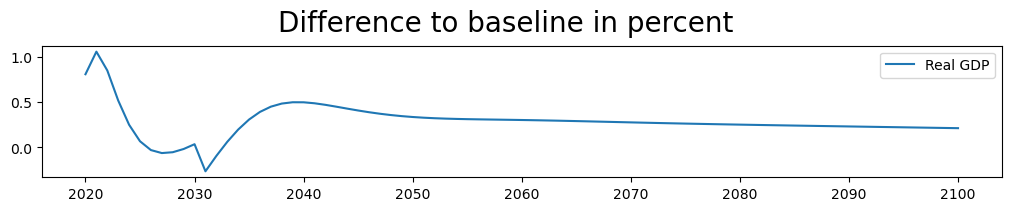

In [24]:
with mpak.set_smpl(2020,2100):
    mpak['PAKNYGDPMKTPKN'].difpctlevel.rename().plot(colrow=1,
                title='Difference to baseline in percent');

### Access values in .lastdf and .basedf

To limit the output printed, we set the time frame to 2020 to 2023. 

In [25]:
mpak.smpl(2020,2023);



To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the latest simulation a small widget is displayed. 

In [26]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

:::{index} []; .base Access basedf 
:::

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the base dataframe, specify .base

In [27]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df


,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.627394e+07,2.367289e+07
2021,2.651137e+07,2.397282e+07
2022,2.668514e+07,2.416413e+07
2023,2.696308e+07,2.442786e+07


:::{index} []; .df Return a dataframe 
:::


### .df  Pandas dataframe 

Sometime you need to perform additional operations on the values. Therefor the .df will return a dataframe with the selected variables. 


In [28]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.648605e+07,2.338267e+07
2021,2.679140e+07,2.358771e+07
2022,2.691168e+07,2.368379e+07
2023,2.710269e+07,2.385588e+07


:::{index} []; .names Variable names
:::

### .names Variable names

If you select variables using wildcards, then you can access the names that correspond to your query.



In [29]:
mpak['PAKNYGDP??????'].names

['PAKNYGDPDISCCN',
 'PAKNYGDPDISCKN',
 'PAKNYGDPFCSTCN',
 'PAKNYGDPFCSTKN',
 'PAKNYGDPFCSTXN',
 'PAKNYGDPMKTPCD',
 'PAKNYGDPMKTPCN',
 'PAKNYGDPMKTPKD',
 'PAKNYGDPMKTPKN',
 'PAKNYGDPMKTPXN',
 'PAKNYGDPPOTLKN']

:::{index} []; .rename() Rename variables to description 
:::



### .rename() replaces the variable mnemonic with its description

Use .rename() to display results using the variable description instead of the mnemonic, which is the default behaviour. 



In [30]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

,Real GDP,HH. Cons Real
2020,2.648605e+07,2.338267e+07
2021,2.679140e+07,2.358771e+07
2022,2.691168e+07,2.368379e+07
2023,2.710269e+07,2.385588e+07


:::{index} single: []; Transformations 
:::

:::{index} single: []; .growth/.dif  Growth rates
:::

:::{index} single: [];  .dif - difference in level
:::

:::{index} single: [];  .difgrowth/.difpct - difference in growth rate
:::

:::{index} single: [];  .difpctlevel - difference in level as a pct of baseline
:::

:::{index} single: [];  .yoy_ar - Growth over 4 periods 
::

:::{index} single: [];  .qoq_ar - Annualized quarterly growth rate
::



### Transformations of solution results 

When the variables has been selected through the index operator a number of standard data transformations can be performed. 

|Transfomation|Meaning|expression 
|:--- |:--- |:--|
| growth (pct) | Growth rates | $\frac{this_t}{this_{t-1}} -1$ |
| dif |Difference in level | $l-b$ |
| difgrowth (difpct) | Difference in growth rate | ${\big[{\frac{l_t}{l_{t-1}}-1}\big]-\big[{\frac{b_t}{b_{t-1}}-1}\big]}$|
| difpctlevel |difference in level as a pct of baseline | $\frac{l_t-b_t}{b_t} $ |

- $this$ is the chained value. Default lastdf but if preceeded by .base the values from .basedf will be used 
- $b$ is the values from .basedf
- $l$ is the values from .lastdf 


### .dif Difference in level 

The 'dif' command displays the difference in levels of the latest and previous solutions.

$l-b$

where l is the variable from the .lastdf and b is the variable from .basedf.  

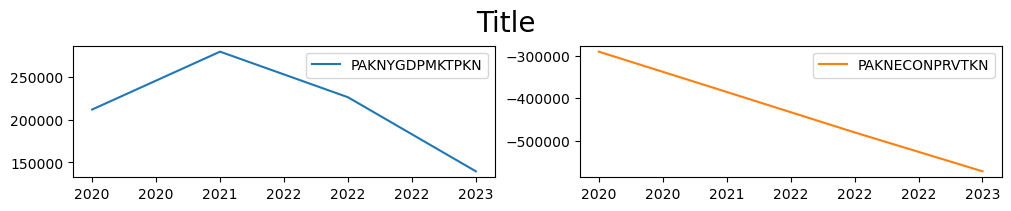

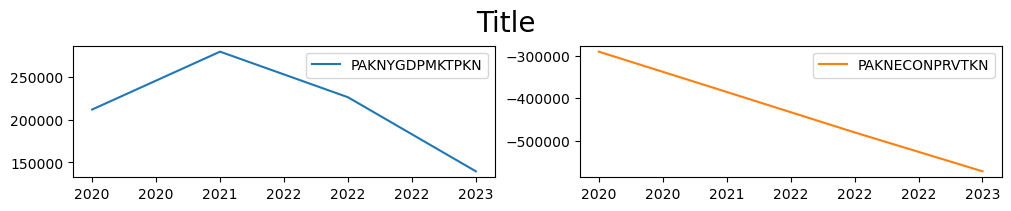

In [31]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

### .growth (.pct)  Growth rates 
Display growth rates

$\left(\cfrac{l_t}{l_{t-1}}-1\right )$

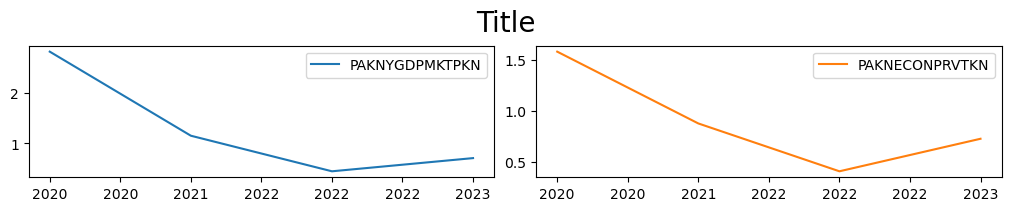

In [32]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].growth.plot();

### .difpct property difference in growth rates 
The difference in the growth rates  between the last and base dataframe.  

$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$

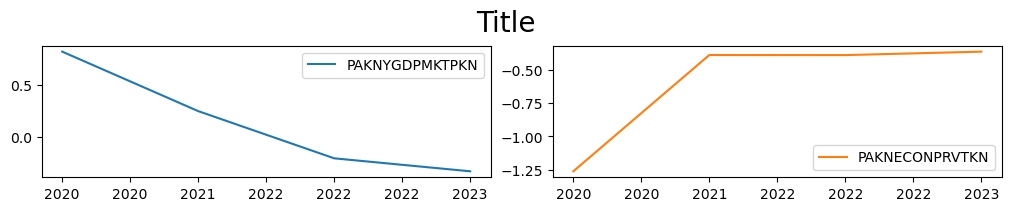

In [33]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

### .difpctlevel percent difference of  levels 

$\left( \cfrac{l_t-b_t}{b_{t}} \right) $

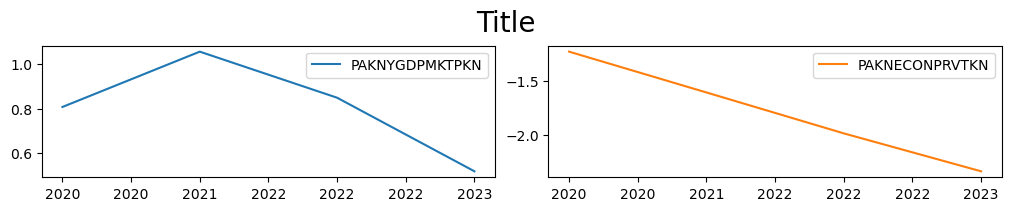

In [34]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

### .yoy_ar  Growth over 4 periods 
This should only be used for quarterly data 

$\left( \cfrac{l_t-b_{t-4}}{b_{t-4}} \right)-1 $

### .qoq_ar Annualized quarterly growth rate
Also for quarterly data 


$\left( \cfrac{l_t-b_t}{b_{t}} \right)^4-1 $


## .plot chart the selected and transformed variables
After the variables has been selected and transformed, they can  be plotted. The .plot() method plots the selected variables separately

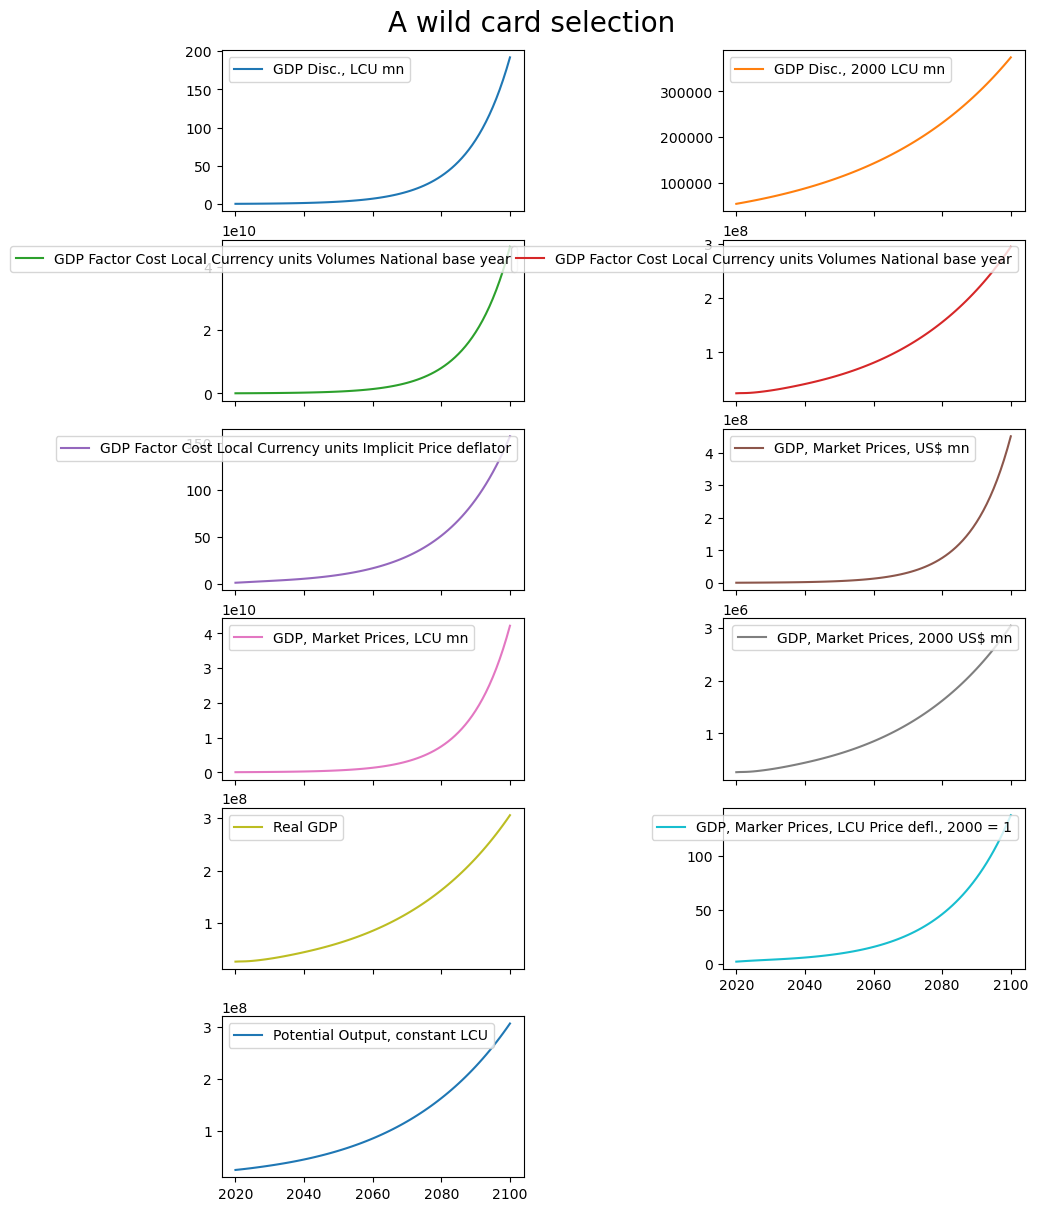

In [35]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot(title="A wild card selection");

### Options to plot() 

Common:<br>
- title (optional): title. Defaults to ''.
- colrow (TYPE, optional): Columns per row . Defaults to 2.
- sharey (TYPE, optional): Share y axis between plots. Defaults to False.
        
        
More excotic:<br>         
- splitchar (TYPE, optional): If the name should be split . Defaults to '__'.
- savefig (TYPE, optional): Save figure. Defaults to ''.
- xsize  (TYPE, optional): x size default to 10 
- ysize  (TYPE, optional): y size per row, defaults to 2
- ppos (optional): # of position to use if split. Defaults to -1.
- kind (TYPE, optional): Matplotlib kind . Defaults to 'line'.


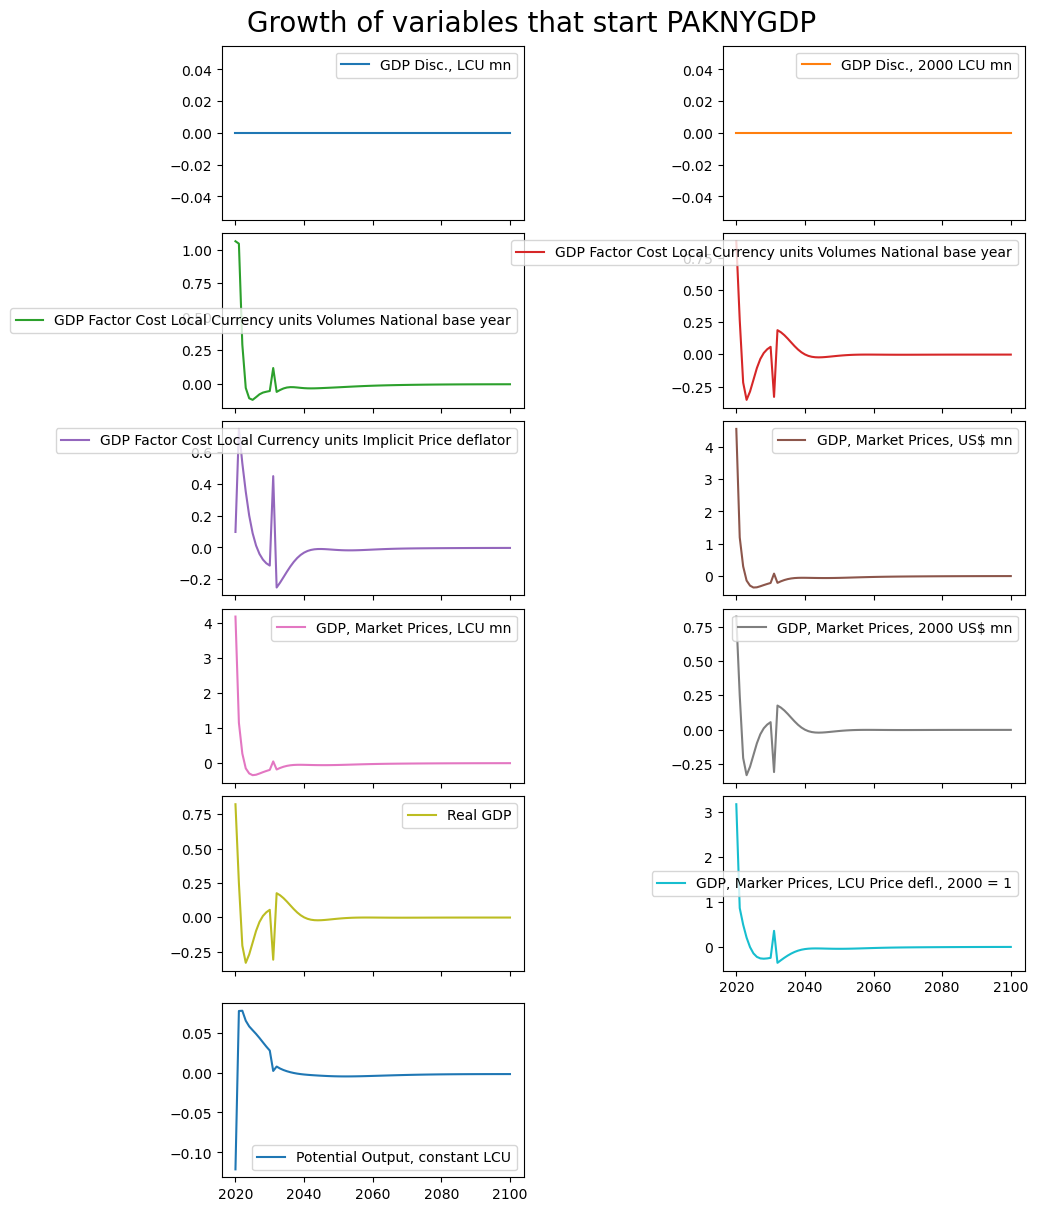

In [36]:
mpak['PAKNYGDP??????'].difpct.rename().plot(title='Growth of variables that start PAKNYGDP');

## Plotting inspiration


The following graph shows the components of GDP using the values of the baseline dataframe. 

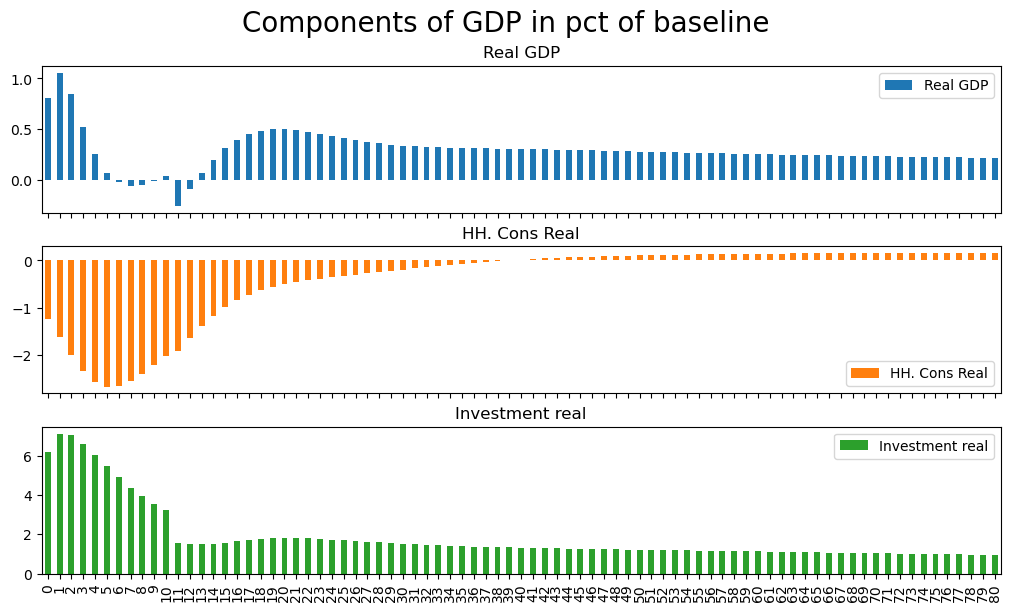

In [37]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,kind='bar') ;

###  Heatmaps

For some model types heatmaps can be helpful, and they come out of the box. This feature was developed for use by bank stress test models. 

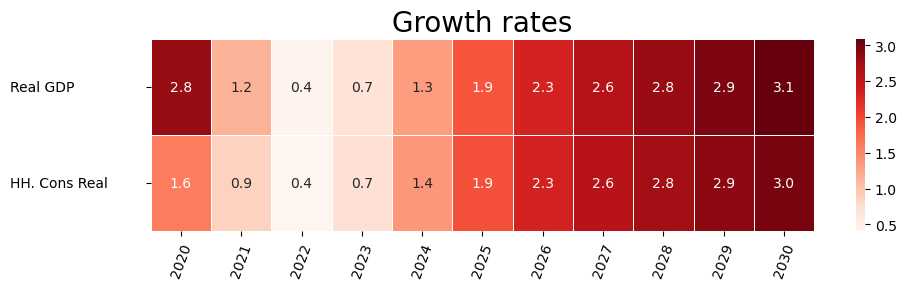

In [38]:
with mpak.set_smpl(2020,2030):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


<a id=’With’></a>
### Violin and boxplots, 
Not obvious for macro models, but useful for stress test  models with many banks. 

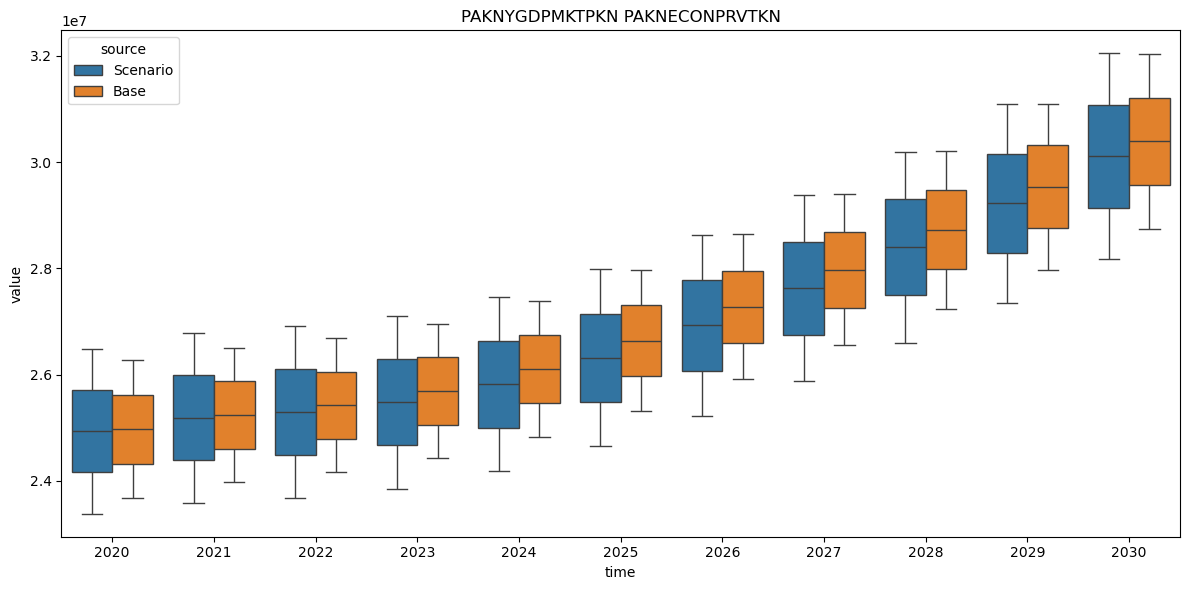

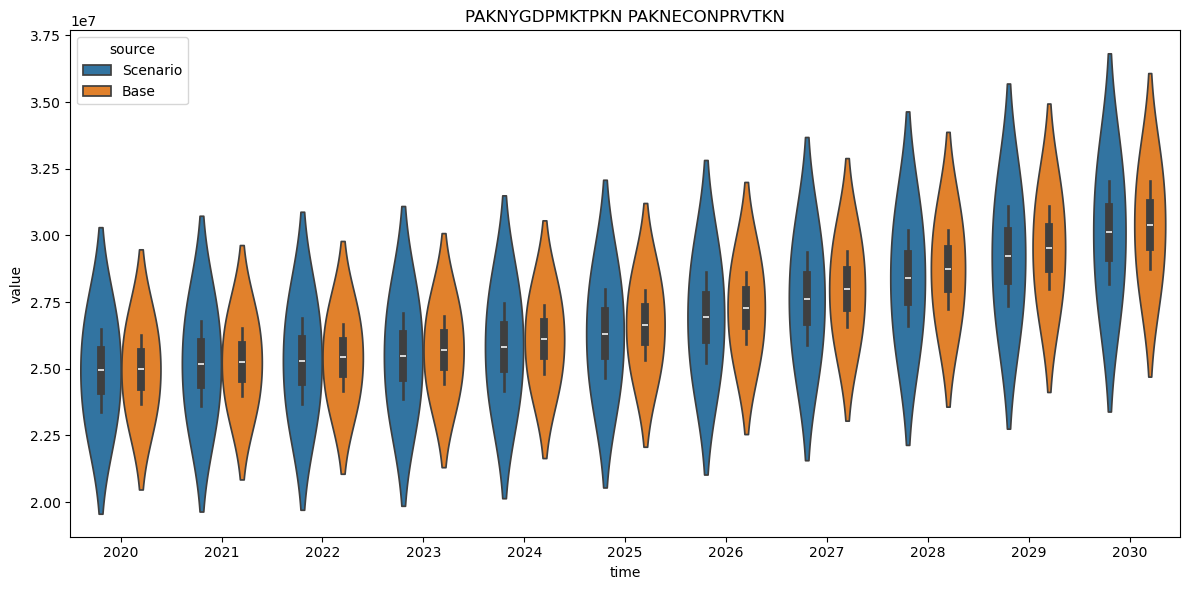

In [39]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  


### Plot baseline vs alternative
A raw routine, only showing levels.
To make it really useful it should be expanded. 

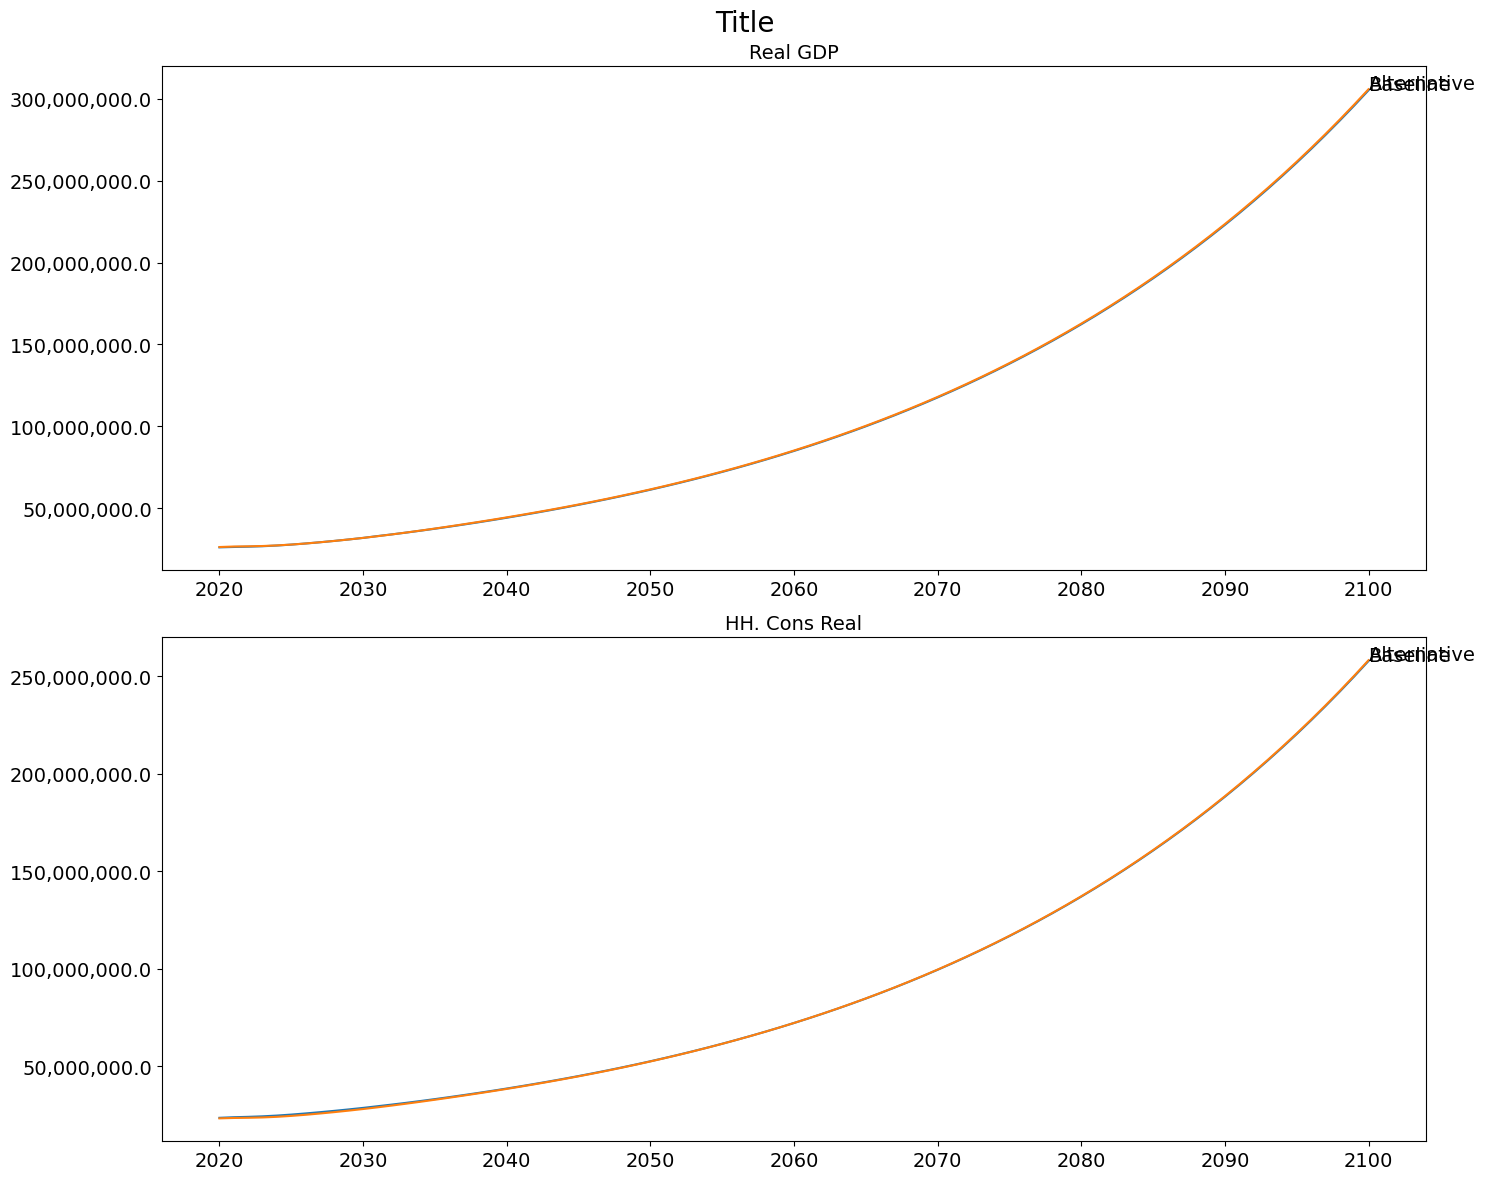

In [40]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;


## .draw() Graphical presentation of relationships between variables

.draw() helps you understand the relationship between variables in your model better. 
 
The thickness the arrow reflect the attribution of the the upstream variable to the impact on the downstream variable. 

### .draw(up = level, down = level)


You can specify how many levels up and down you want in your graphical presentation (Needs more explanation).

In this example all variables that depend directly upon GDP and consumption as well as those that are determined by them, are displayed. This means one step upstream in the model logic and one step downstream. 

More on the how to visualize the logic structure [here](../06_ModelAnalytics/ModelStructure.ipynb) 

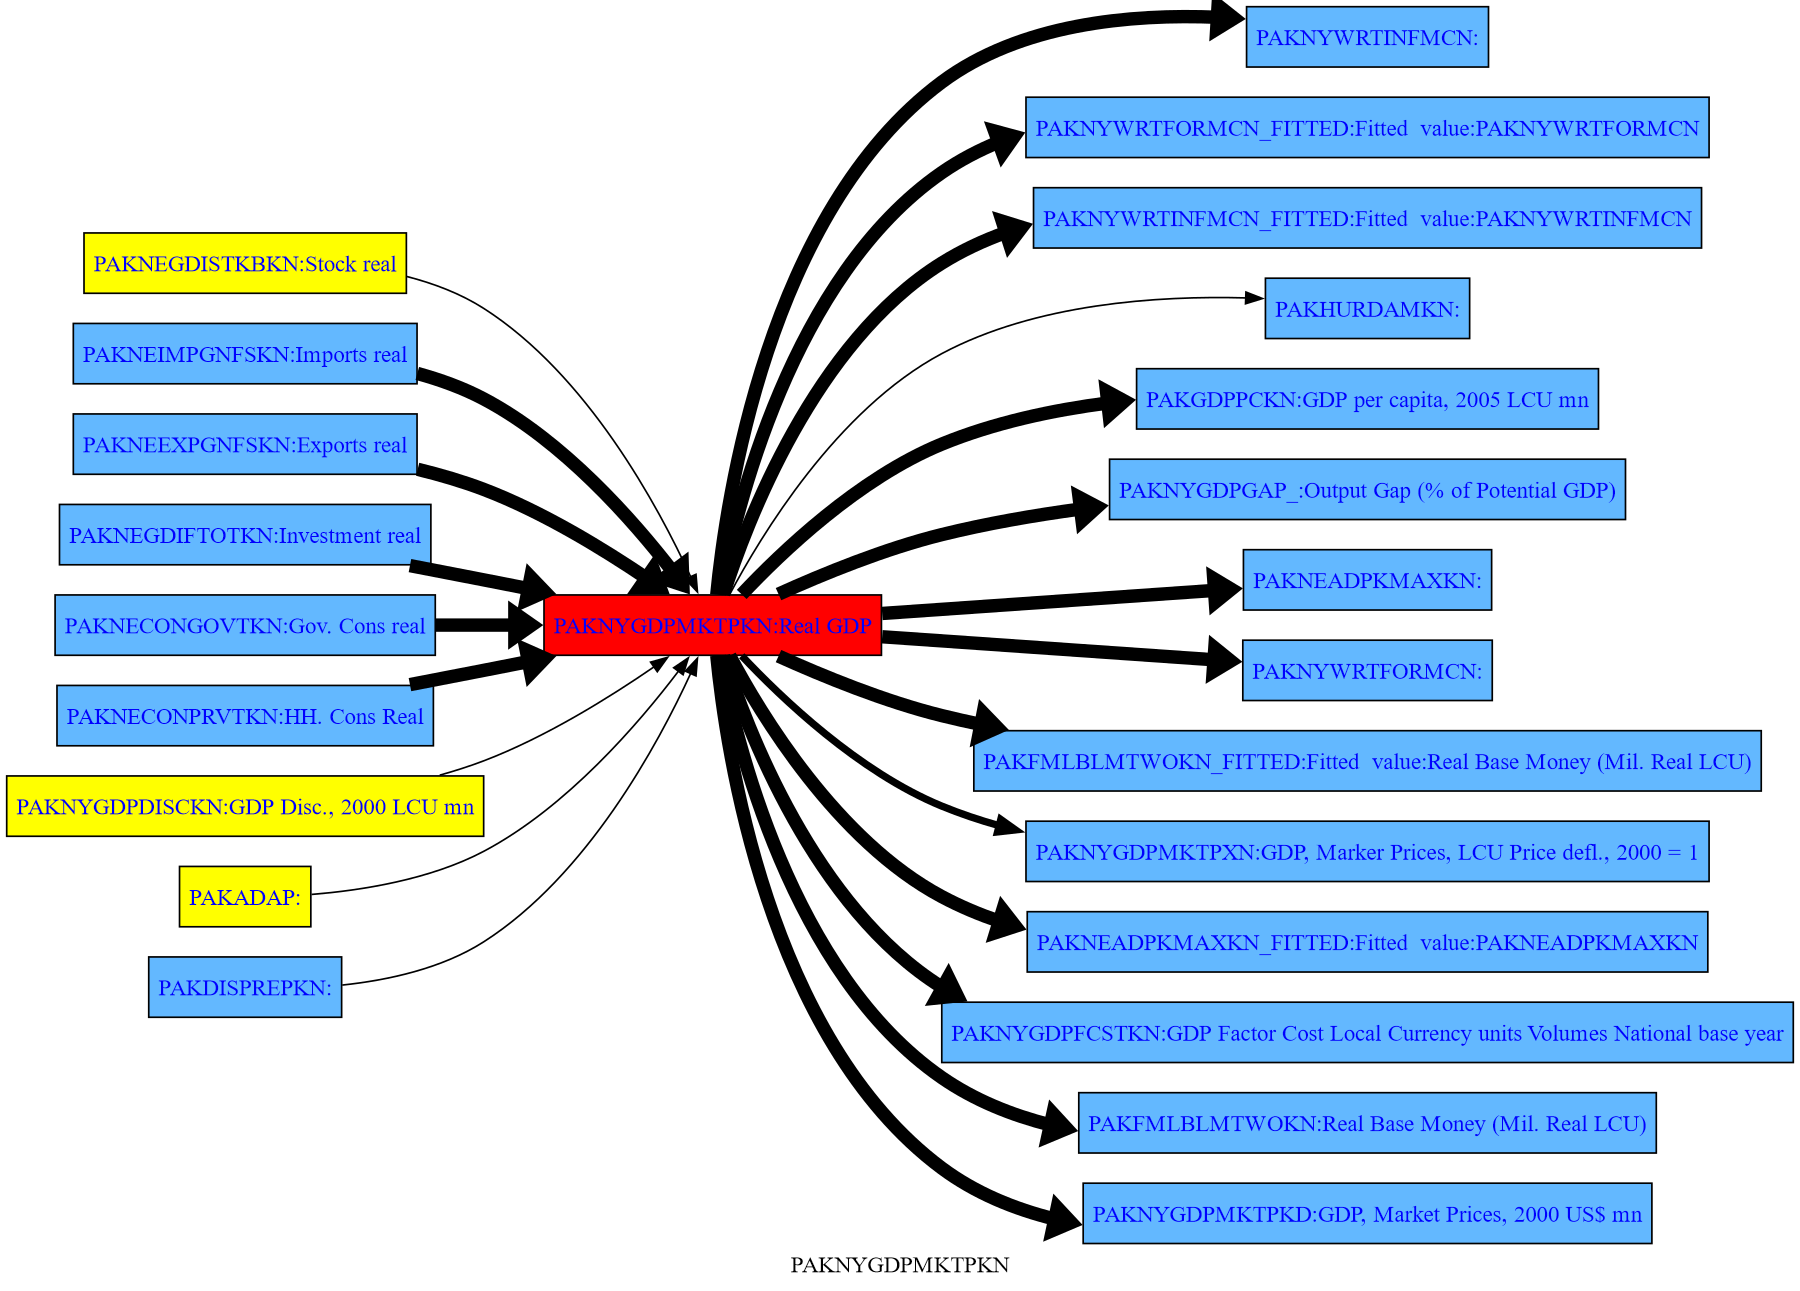

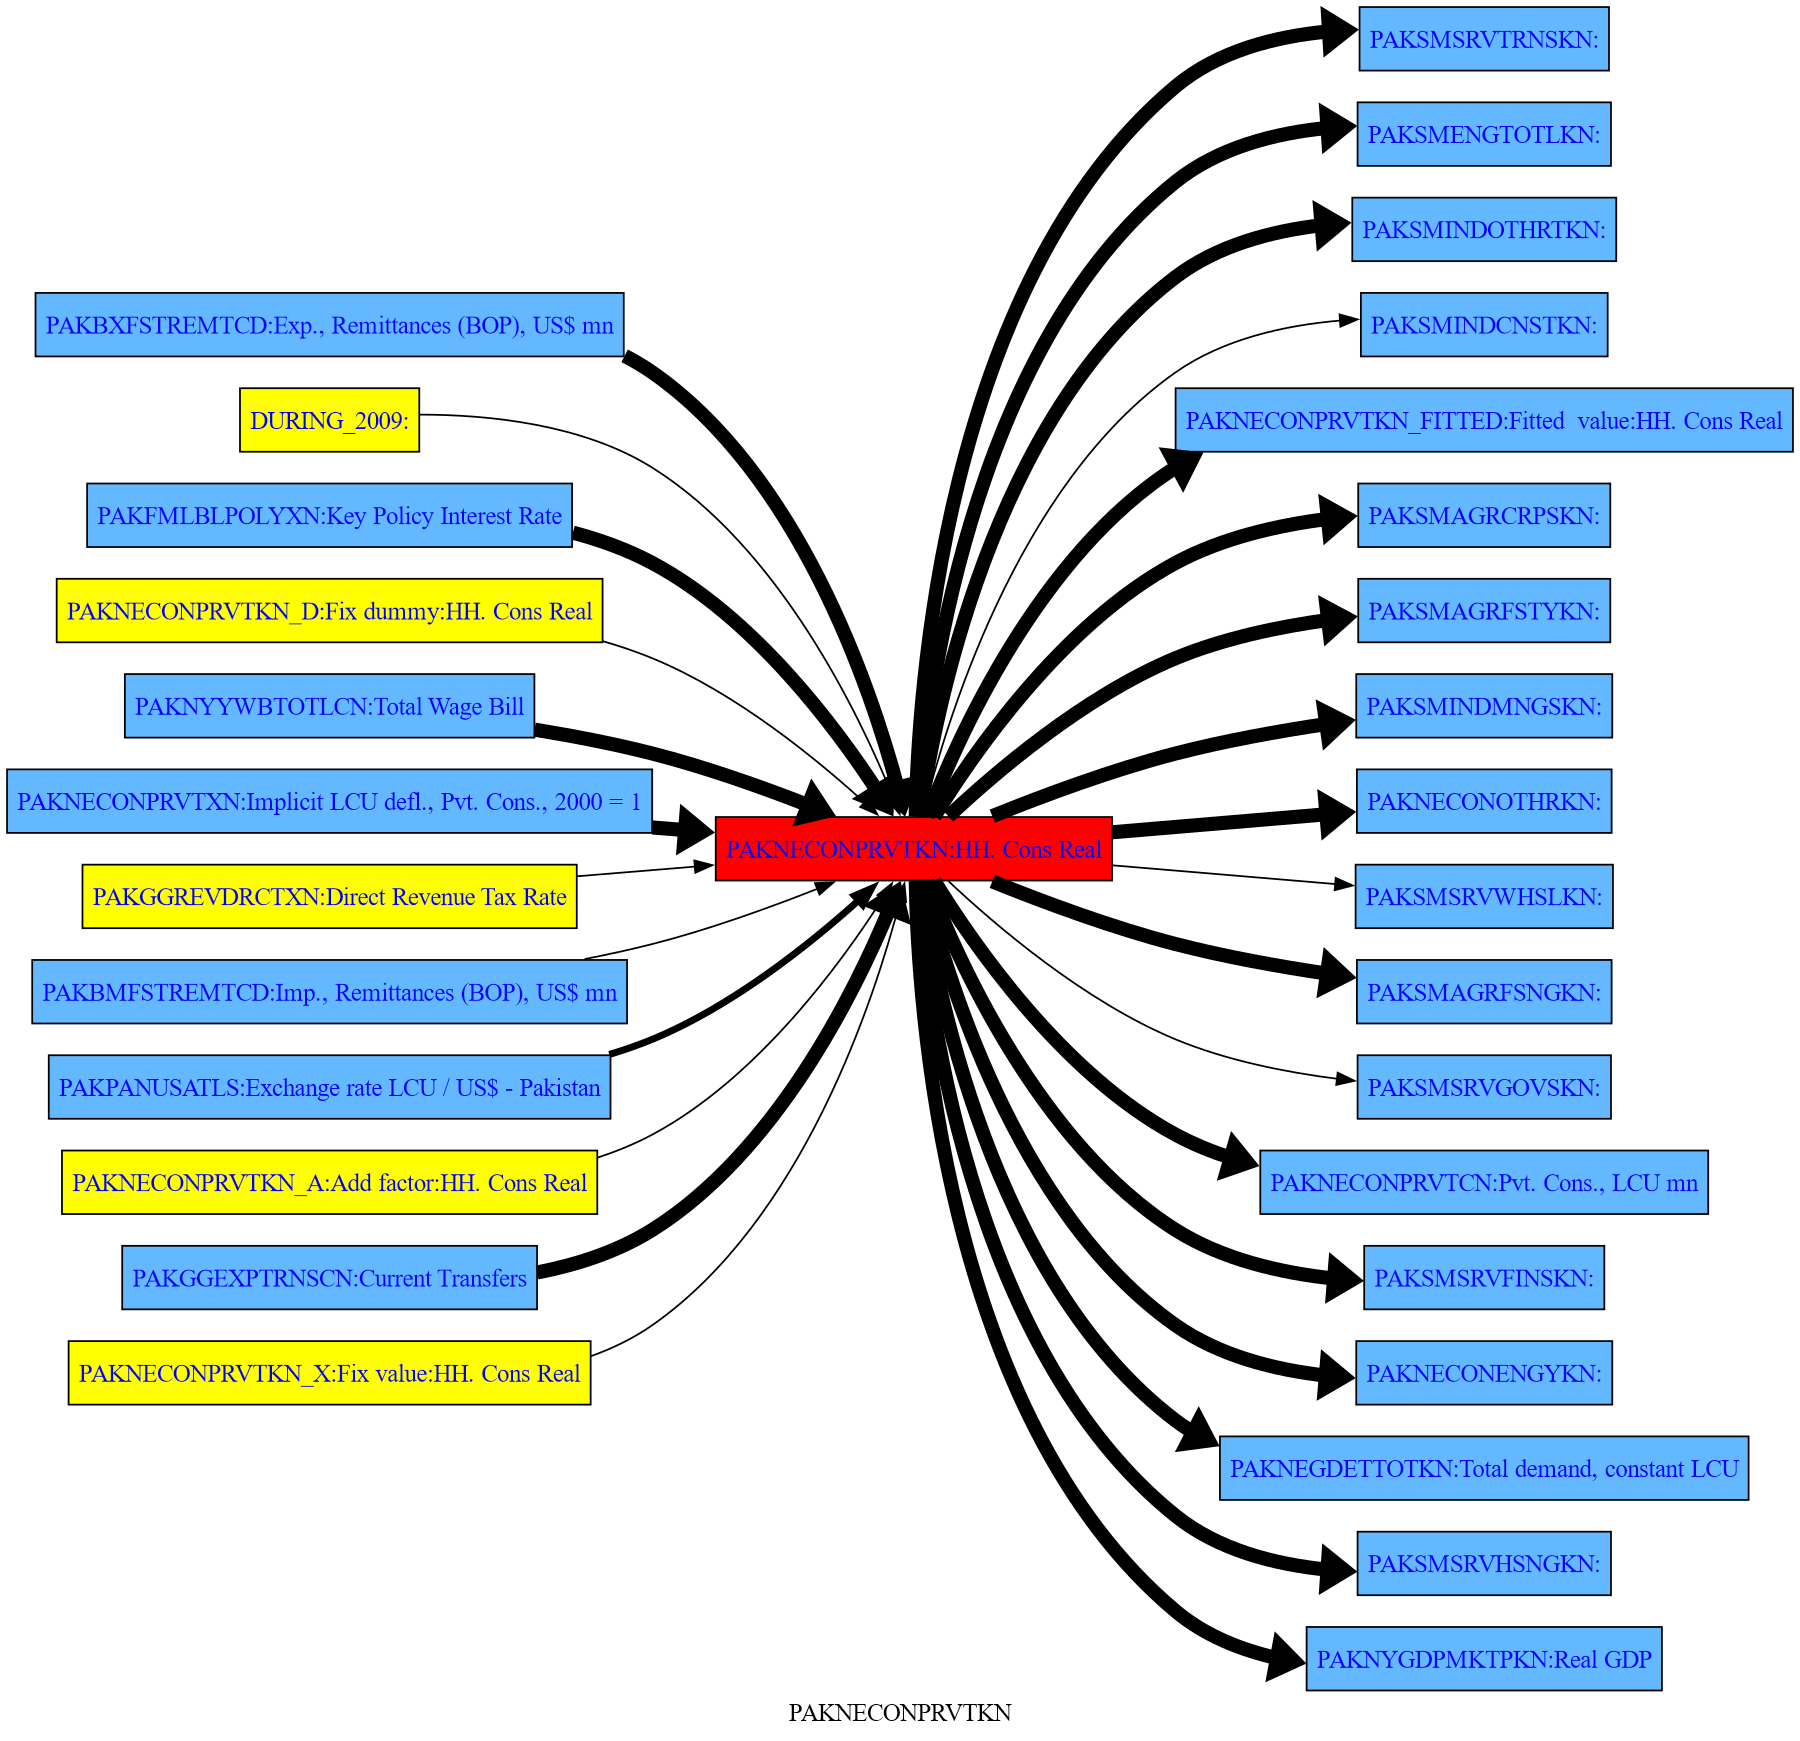

In [41]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1,png=latex)  # diagram of all direct dependencies 

### .draw(filter =\<minimal impact>)

By specifying filter=  only links where the minimal impact is more than \<minimal impact> are show. In this case 20% 


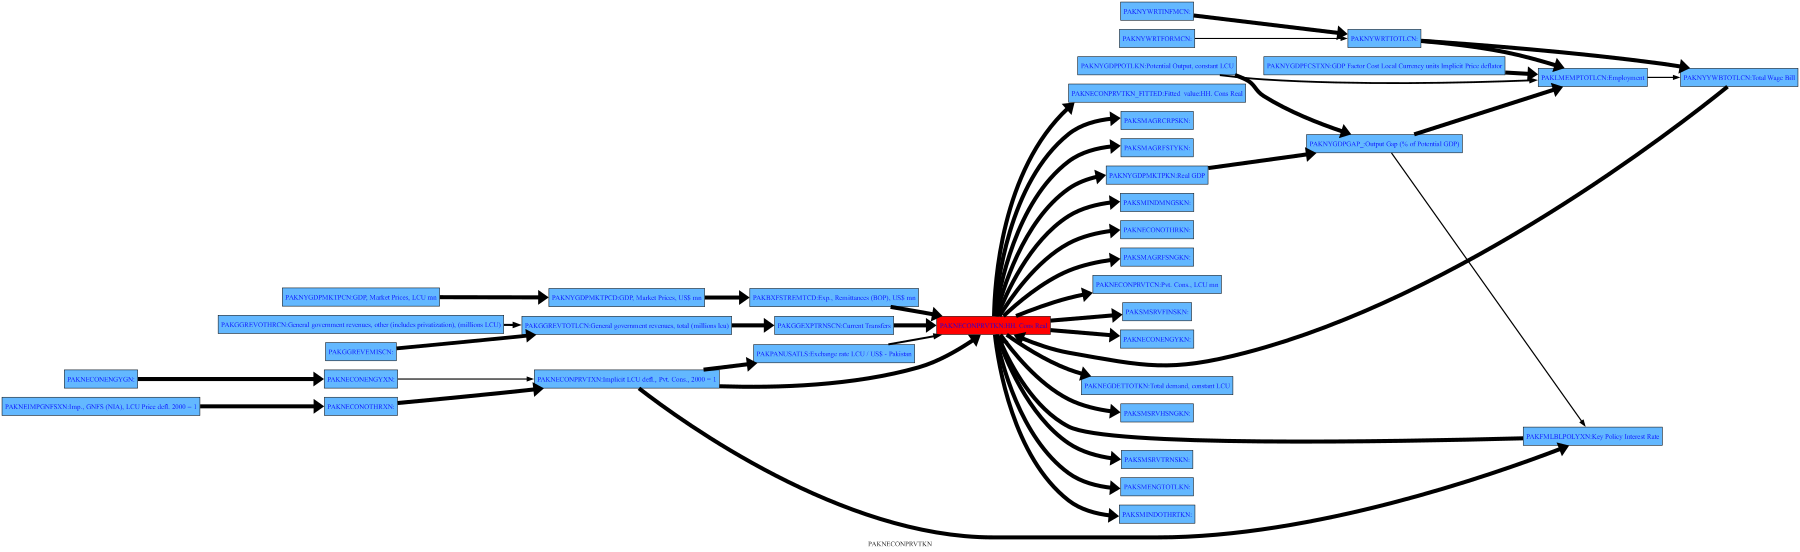

In [42]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20,png=latex)  



## dekomp() Attribution of right hand side variables to
change in result. 
For more information on attribution look [here](../06_ModelAnalytics/AttributionSomeFeatures.ipynb)

The dekomp command decomposes the contributions of the right hand side variables to the observed change in the left hand side variables. 

In [43]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dekomp()  # frml attribution 


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                       2021        2022        2023        2024        2025
Variable    lag                                                            
Base        0   26511370.42 26685141.88 26963077.58 27393200.42 27963231.62
Alternative 0   26791399.36 26911678.25 27102694.04 27461697.73 27982312.93
Difference  0     280028.94   226536.37   139616.46    68497.31    19081.31
Percent     0          1.06        0.85        0.52        0.25        0.07

 Contributions to differende for  PAKNYGDPMKTPKN
                         2021       2022       2023       2024       2025
Variable       lag                                                       
PAKNECONPRVTKN 0   -385108.23 -480338.17 -571986.83 -637287.47 -673835.87
PAKNECONGOVTKN 0    348838.87  308073.15  266583.79  241492.44  228134.85
PAKNEGDIFTOTKN 0    

## Bespoken plots using matplotlib  (or plotly -later) (should go to a separate plot book 

The predefined plots are not necessary created for presentation purpose. To create  bespoken plots the they can be 
constructed directly in python scripts. The two main libraries are matplotlib, plotly but any ther python plotting library can be used. Here is an example using matplotlib. 

## Plot four separate plots of multiple series in grid   

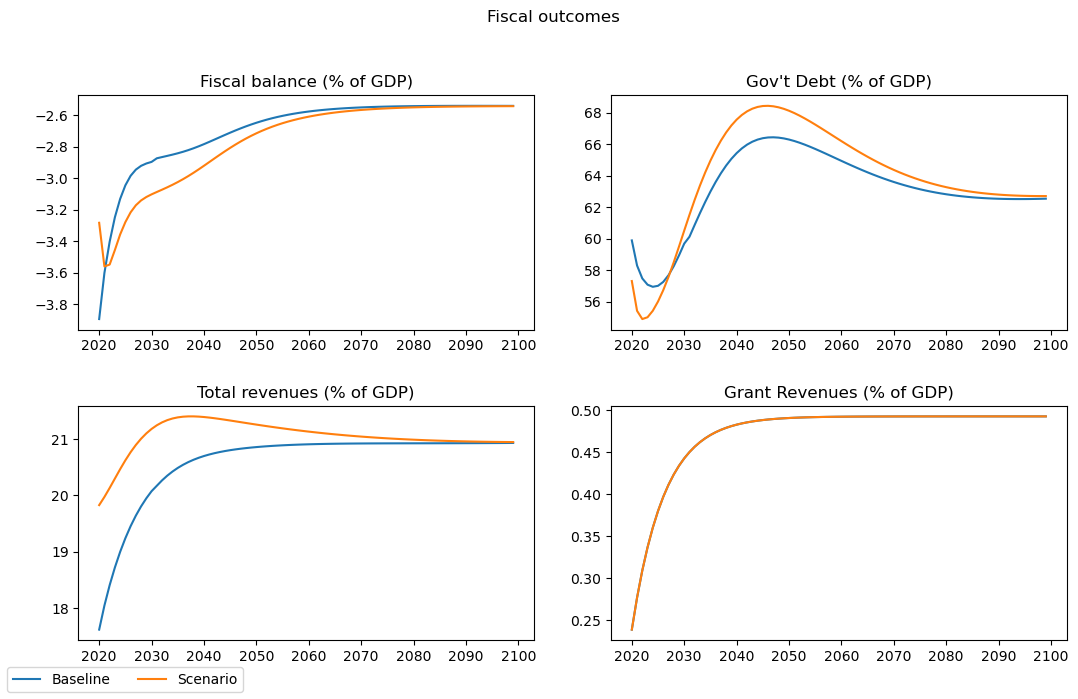

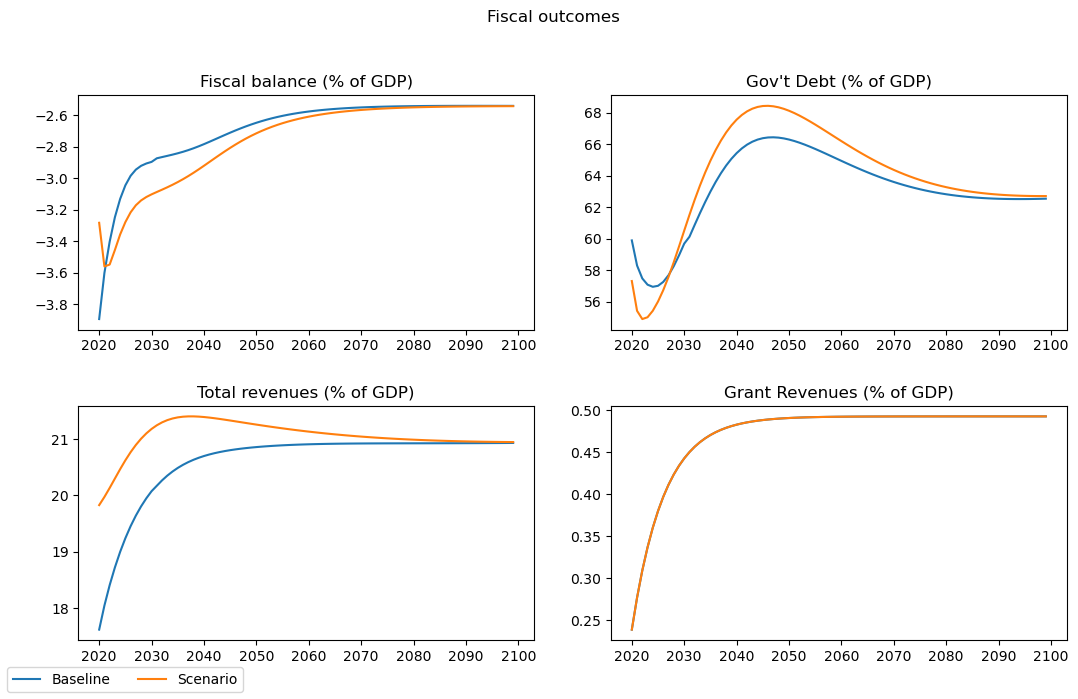

In [44]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure